In [157]:
# simple returns
# EP - BP / BP - multiple assets over the same timeframe
# EP / BP - 1

# EP / BG - single asset

# deviation
# daily_returns.std() * 250**0.5

In [158]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm


ticker = "PG"

data = yf.download(ticker, start="2007-01-01", end="2017-03-21")["Close"]
data

/var/folders/9t/pmjxxbqs3j19rnf8hr5qxzvm0000gn/T/ipykernel_34142/2521377638.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2007-01-01", end="2017-03-21")["Close"]
[*********************100%***********************]  1 of 1 completed


Ticker,PG
Date,
2007-01-03,37.885490
2007-01-04,37.597866
2007-01-05,37.275009
2007-01-08,37.357193
2007-01-09,37.263256
...,...
2017-03-14,72.460960
2017-03-15,72.779457
2017-03-16,72.811302


In [159]:
log_returns = np.log(1 + data.pct_change()).dropna()
log_returns

Ticker,PG
Date,
2007-01-04,-0.007621
2007-01-05,-0.008624
2007-01-08,0.002202
2007-01-09,-0.002518
2007-01-10,0.011902
...,...
2017-03-14,-0.003400
2017-03-15,0.004386
2017-03-16,0.000437


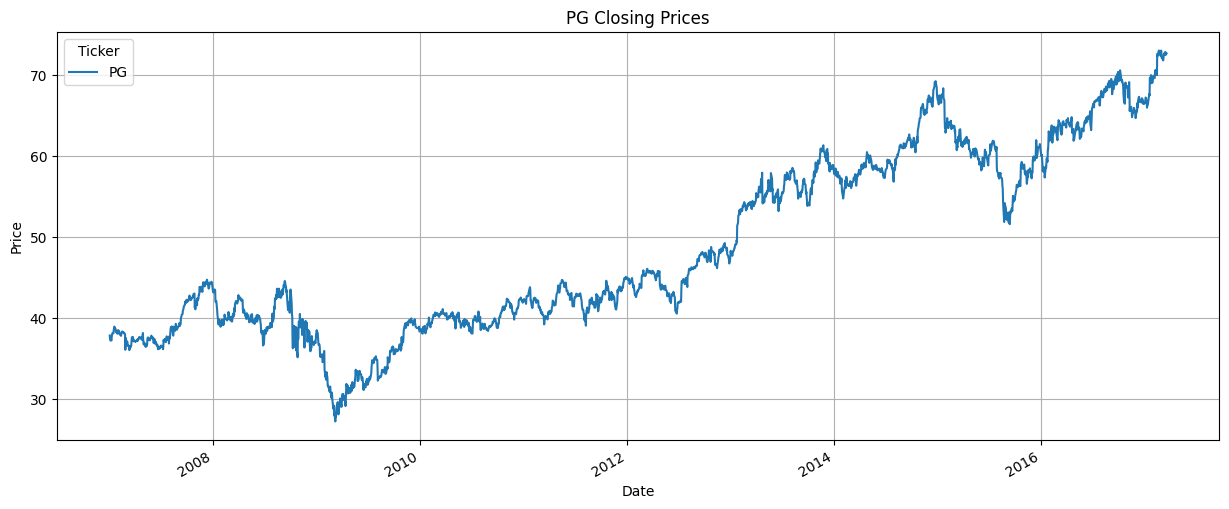

In [160]:
data.plot(figsize=(15, 6))
plt.title(f"{ticker} Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()
plt.show()

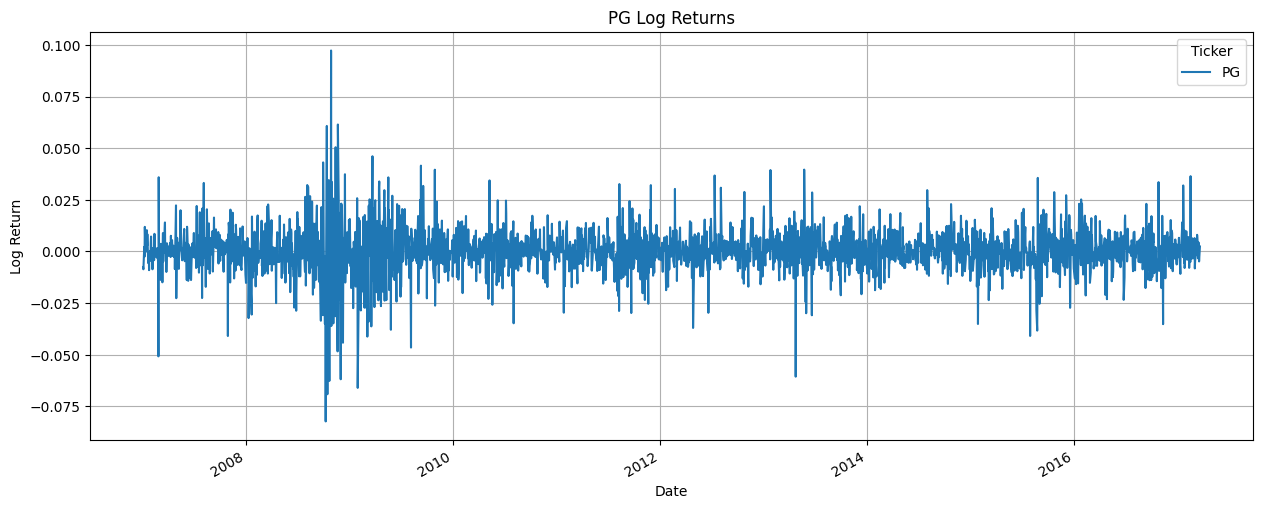

In [161]:
log_returns.plot(figsize=(15, 6))
plt.title(f"{ticker} Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid()
plt.show()

In [162]:
u = log_returns.mean()
u

Ticker
PG    0.000253
dtype: float64

In [163]:
var = log_returns.var()
var

Ticker
PG    0.000125
dtype: float64

In [164]:
drift = u - (0.5 * var)
drift

Ticker
PG    0.000191
dtype: float64

In [165]:
stdev = log_returns.std()
stdev

Ticker
PG    0.011168
dtype: float64

In [166]:
type(stdev)

pandas.core.series.Series

In [167]:
drift.values

array([0.0001909])

In [168]:
stdev.values

array([0.01116817])

In [169]:
norm.ppf(0.95)

np.float64(1.644853626951472)

In [170]:
x = np.random.rand(10, 2)
x

array([[3.69111069e-01, 4.56440397e-01],
       [5.55449214e-01, 2.41831130e-01],
       [2.55713735e-01, 9.43516784e-01],
       [2.83029700e-01, 6.16554681e-01],
       [4.76159263e-01, 8.01073358e-01],
       [2.94111854e-01, 3.98511694e-02],
       [7.87423269e-01, 9.18456635e-02],
       [3.93156967e-01, 4.66775050e-01],
       [1.53612268e-01, 5.93429282e-01],
       [3.71641504e-01, 8.20153887e-04]])

In [171]:
norm.ppf(x)

array([[-0.33420862, -0.1094056 ],
       [ 0.13944113, -0.70042447],
       [-0.6566166 ,  1.58499957],
       [-0.57386464,  0.29644451],
       [-0.05979548,  0.84546139],
       [-0.5414119 , -1.75241579],
       [ 0.79751247, -1.32947494],
       [-0.27110024, -0.08337911],
       [-1.02106312,  0.23637533],
       [-0.3275089 , -3.14864241]])

In [172]:
Z = norm.ppf(np.random.rand(10, 2))
Z

array([[-4.75400256e-02,  6.26308998e-01],
       [-2.15016254e-01,  7.67321077e-01],
       [-1.66741126e+00, -1.21857727e-01],
       [ 8.87895873e-01,  5.86877934e-01],
       [ 1.71560826e-04,  6.34562372e-01],
       [-3.95405021e-01, -6.38674930e-01],
       [-8.51056885e-01,  1.18330698e+00],
       [-3.13046037e-01,  8.35903964e-01],
       [ 8.53591431e-01, -1.28567384e+00],
       [ 3.09561622e-01, -1.08092010e+00]])

In [173]:
t_intervals = 1000
iterations = 10

In [174]:
daily_returns = np.exp(
    drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations))
)

daily_returns

array([[0.994145  , 0.98757111, 0.98973217, ..., 1.0013727 , 1.00375867,
        0.99176511],
       [0.98249246, 0.98901374, 1.00008993, ..., 1.00433392, 1.01195644,
        0.99789021],
       [0.99277738, 0.99293553, 1.0071888 , ..., 1.01316827, 0.99908472,
        0.99747568],
       ...,
       [1.01699286, 1.01707528, 0.99723949, ..., 1.01578004, 0.99912663,
        0.99263696],
       [1.02577989, 1.01756089, 0.99469964, ..., 1.00442908, 0.9978535 ,
        1.02304358],
       [0.99453614, 0.9925915 , 1.01074934, ..., 0.99482167, 1.00807552,
        1.00184289]], shape=(1000, 10))

In [175]:
S0 = data.iloc[-1]
S0

Ticker
PG    72.636116
Name: 2017-03-20 00:00:00, dtype: float64

In [176]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1000, 10))

In [177]:
price_list[0] = S0
price_list

array([[72.63611603, 72.63611603, 72.63611603, ..., 72.63611603,
        72.63611603, 72.63611603],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], shape=(1000, 10))

In [178]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

price_list

array([[ 72.63611603,  72.63611603,  72.63611603, ...,  72.63611603,
         72.63611603,  72.63611603],
       [ 71.36443655,  71.83811704,  72.64264838, ...,  72.9509152 ,
         73.50458552,  72.4828692 ],
       [ 70.84899859,  71.33061858,  73.16486162, ...,  73.91155233,
         73.43730814,  72.2998993 ],
       ...,
       [ 51.92526457,  94.08078282,  60.74770267, ...,  70.78554431,
         55.78410136,  99.9664432 ],
       [ 53.263892  ,  95.73292476,  60.42571806, ...,  71.09905949,
         55.66436101, 102.27002806],
       [ 52.9728653 ,  95.02368696,  61.07525461, ...,  70.73088496,
         56.11387943, 102.4585003 ]], shape=(1000, 10))

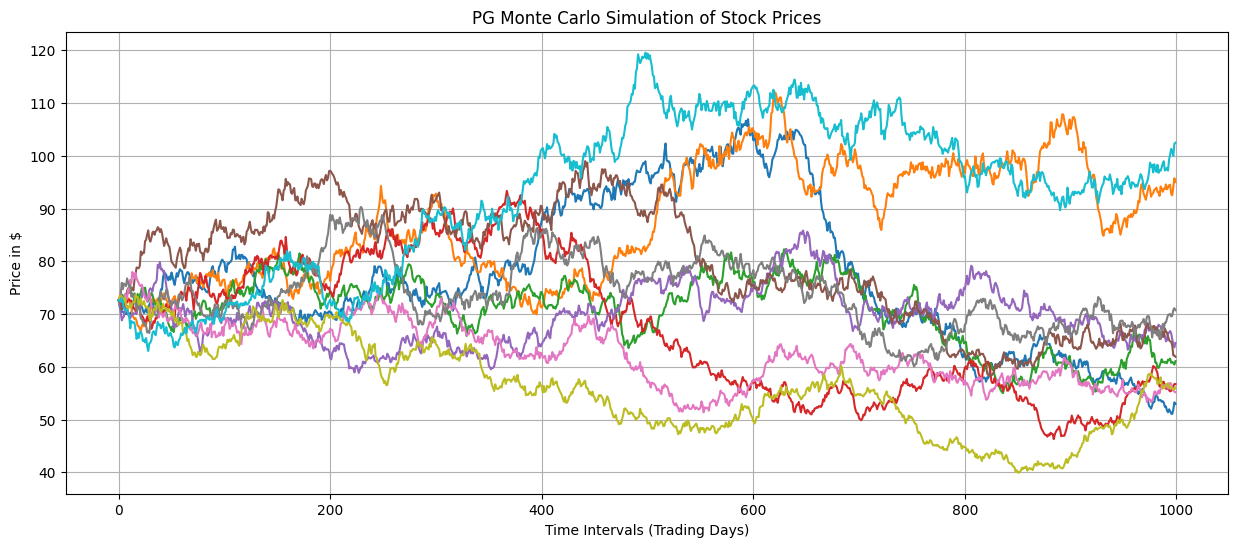

In [179]:
plt.figure(figsize=(15, 6))
plt.plot(price_list)
plt.title(f"{ticker} Monte Carlo Simulation of Stock Prices")
plt.xlabel("Time Intervals (Trading Days)")
plt.ylabel("Price in $")
plt.grid()
plt.show()

In [180]:
def d1(S, K, r, stdev, T):
    return (np.log(S / K) + (r + stdev**2 / 2) * T) / (stdev * np.sqrt(T))


def d2(S, K, r, stdev, T):
    return (np.log(S / K) + (r - stdev**2 / 2) * T) / (stdev * np.sqrt(T))

In [181]:
def BSM(S, K, r, stdev, T):
    return S * norm.cdf(d1(S, K, r, stdev, T)) - K * np.exp(-r * T) * norm.cdf(
        d2(S, K, r, stdev, T)
    )

In [182]:
stdev = log_returns.std() * 250**0.5
S0

Ticker
PG    72.636116
Name: 2017-03-20 00:00:00, dtype: float64

In [ ]:
r = 0.025
K = 110.0
T = 1

In [184]:
d1(S0, K, r, stdev, T)

Ticker
PG   -2.120387
dtype: float64

In [185]:
d2(S0, K, r, stdev, T)

Ticker
PG   -2.296971
dtype: float64

In [186]:
BSM(S0, K, r, stdev, T)

Ticker
PG    0.074086
Name: 2017-03-20 00:00:00, dtype: float64